In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal, lognorm, uniform, norm
from scipy.linalg import cholesky
from scipy.optimize import minimize
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

After importing all necesssary libraries, we create our vector space. 

In [79]:
x = np.linspace(0.01, 4, 200)
y = np.linspace(0.01, 6, 200)
X, Y = np.meshgrid(x, y)

We define our parameters

In [85]:
mu = np.array([np.log(1), np.log(2)])
sigma_1 = np.array([[0.5**2, 0], 
                    [0, 0.4**2]])
sigma_2 = np.array([[0.5**2, 0.5*0.4*0.5], 
                    [0.5*0.5*0.4, 0.4**2]])

We define out bivariate lognormal pdf function.

In [88]:
def bi_lognormal_pdf(x, y, mu, sigma):
    if np.any(x<=0) or np.any(y<=0):
        return np.zeros_like(x)
    z = np.stack([np.log(x), np.log(y)], axis=-1)
    bivariate_normal = multivariate_normal(mean=mu, cov=sigma)
    return bivariate_normal.pdf(z) / (x * y)

In [89]:
p1 = bi_lognormal_pdf(X, Y, mu, sigma_1)
p2 = bi_lognormal_pdf(X, Y, mu, sigma_2)

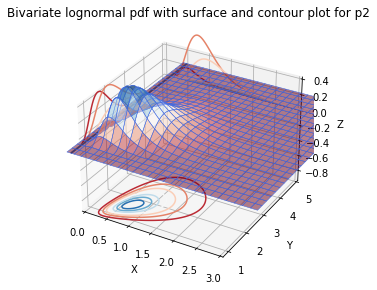

In [302]:
from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, p2, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.5, cmap='RdBu')
ax.contour(X, Y, p2, zdir='z', offset=-0.9, cmap='RdBu')
ax.contour(X, Y, p2,zdir='x', offset=0.1, cmap='RdBu')
ax.contour(X, Y, p2, zdir='y', offset=5.1, cmap='RdBu')
ax.set(xlim=(0, 3), ylim=(0.8, 5), zlim=(-0.91, 0.4),
       xlabel='X', ylabel='Y', zlabel='Z')
# ax.set_ylim(0.8, 5)
# ax.set_xlim(0, 3)
ax.set_title("Bivariate lognormal pdf with surface and contour plot for p2")


plt.tight_layout()
plt.show()

[(0.0, 3.0),
 (0.0, 5.0),
 Text(0.5, 0, 'x'),
 Text(0, 0.5, 'y'),
 Text(0.5, 1.0, 'Bivariate lognormall contour plot p2')]

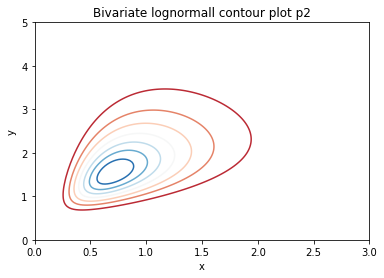

In [296]:
fig, ax = plt.subplots()
ax.contour(X, Y, p2, cmap='RdBu')
ax.set(xlim=(0, 3), ylim=(0, 5),
       xlabel='x', ylabel='y', title='Bivariate lognormall contour plot p2')

In [185]:
mu_x1 = np.exp(mu[0])
mu_x2 = np.exp(mu[0])
sigma_x1 = np.sqrt(sigma_1[0, 0])
sigma_x2 = np.sqrt(sigma_2[0, 0])

log1 = lognorm(s=sigma_x1, scale=mu_x1)
log2 = lognorm(s=sigma_x2, scale=mu_x2)

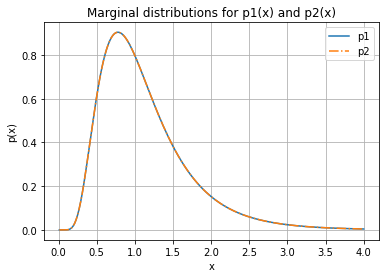

In [231]:
fig, ax1 = plt.subplots()
ax1.plot(x, log1.pdf(x), label='p1')
ax1.plot(x, log2.pdf(x), linestyle='-.', label='p2')
ax1.set(xlabel='x', ylabel='p(x)', title='Marginal distributions for p1(x) and p2(x)')
ax1.grid()
ax1.legend()

For the conditional of bivariate gaussian we have to calculate the mean and standard deviation based on the conditional. 

In [209]:
mu_x2_c = mu[0] + (sigma_2[0, 1] / sigma_2[1, 1]) * (np.log(1) - mu[1])
sigma_x2_c = sigma_2[0, 0] - ((sigma_2[0, 1]) ** 2) / sigma_2[1, 1]
cond1 = lognorm(s=np.sqrt(sigma_x2_c), scale=np.exp(mu_x2_c))

mu_x2_2c = mu[0] + (sigma_2[0, 1] / sigma_2[1, 1]) * (np.log(2) - mu[1])

cond1 = lognorm(s=np.sqrt(sigma_x2_c), scale=np.exp(mu_x2_c))
cond2 = lognorm(s=np.sqrt(sigma_x2_c), scale=np.exp(mu_x2_2c))

[Text(0.5, 0, 'x'), Text(0, 0.5, 'p(x|y)')]

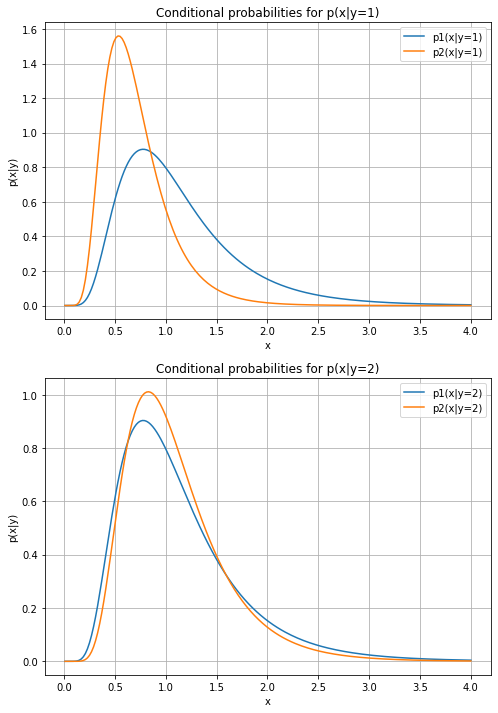

In [311]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=[8,12])

ax1.plot(x, log1.pdf(x), label=f'p1(x|y=1)')
ax1.plot(x, cond1.pdf(x), label=f'p2(x|y=1)')
ax1.set_title('Conditional probabilities for p(x|y=1)')
ax1.grid()
ax1.legend()
ax1.set(xlabel='x', ylabel='p(x|y)')

ax2.plot(x, log1.pdf(x), label=f'p1(x|y=2)')
ax2.plot(x, cond2.pdf(x), label=f'p2(x|y=2)')
ax2.grid()
ax2.set_title('Conditional probabilities for p(x|y=2)')
ax2.legend()
ax2.set(xlabel='x', ylabel='p(x|y)')

[Text(0.5, 1.0, 'rnd generated samples for p2')]

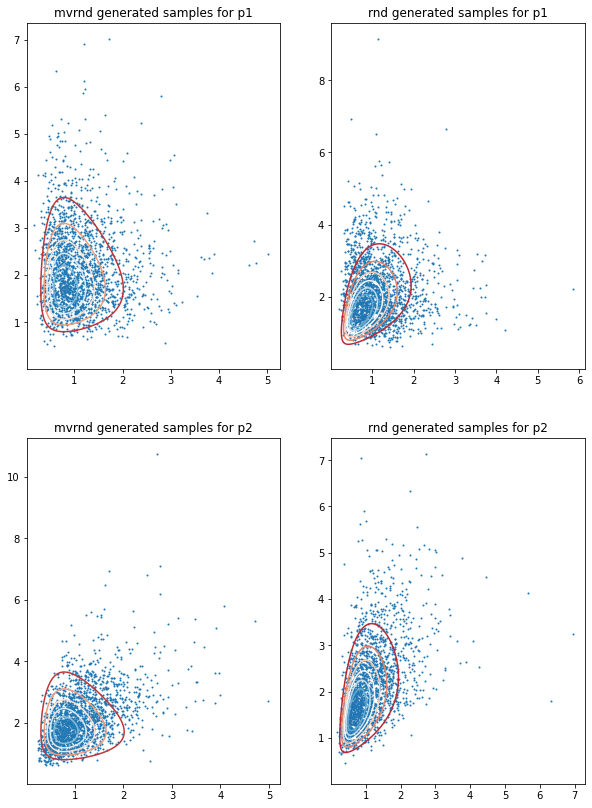

In [345]:
#mvrnd generated samples
samples1 = np.random.multivariate_normal(mu, sigma_1, 2000)
samples2 = np.random.multivariate_normal(mu, sigma_2, 2000)
samples1 = np.exp(samples1)
samples2 = np.exp(samples2)

# plt.figure()
# plt.subplot(1,2,1)
# plt.plot(samples1[:,0], samples1[:,1], 'o', markersize=1)
# plt.title('mvrnd generated samples for p1')
# plt.xlabel('x'); plt.ylabel('y')
# plt.subplot(1,2,2)
# plt.plot(samples2[:,0], samples2[:,1], 'o', markersize=1)
# plt.title('mvrnd generated samples for p2')
# plt.xlabel('x'); plt.ylabel('y')

#rnd samples

L1 = np.linalg.cholesky(sigma_1)
L2 = np.linalg.cholesky(sigma_2)

samples1_1 = mu[:, None] + L1 @ np.random.randn(2, 2000)
samples1_1 = np.exp(samples1_1.T)

samples2_2 = mu[:, None] + L2 @ np.random.randn(2, 2000)
samples2_2 = np.exp(samples2_2.T)

# plt.figure()
# plt.plot(samples1_1[:,0], samples1_1[:,1], 'o', markersize=1)
# plt.title('rnd generated samples for p1')
# plt.xlabel('x'); plt.ylabel('y')
# plt.figure()
# plt.plot(samples2_2[:,0], samples2_2[:,1], 'o', markersize=1)
# plt.title('rnd generated samples for p2')
# plt.xlabel('x'); plt.ylabel('y')

fig, axs = plt.subplots(2, 2, figsize=[10, 14])
axs[0,0].scatter(samples1[:,0], samples1[:,1], s=1)
axs[0,0].contour(X, Y, p1, cmap='RdBu', )
axs[0,0].set(title='mvrnd generated samples for p1')
axs[1,0].contour(X, Y, p1, cmap='RdBu')
axs[1,0].scatter(samples2[:,0], samples2[:,1], s=1)
axs[1,0].set(title='mvrnd generated samples for p2')
axs[0,1].scatter(samples1_1[:,0], samples1_1[:,1], s=1)
axs[0,1].contour(X, Y, p2, cmap='RdBu')
axs[0,1].set(title='rnd generated samples for p1')
axs[1,1].scatter(samples2_2[:,0], samples2_2[:,1], s=1)
axs[1,1].contour(X, Y, p2, cmap='RdBu')
axs[1,1].set(title='rnd generated samples for p2')

In [346]:
theoretical_mean = np.exp(mu[0] + sigma_1[0, 0] / 2)
theoretical_var = (np.exp(sigma_1[0, 0] ** 2) - 1) * (np.exp(2 * mu[0] + sigma[0, 0] ** 2))

N_space = np.logspace(1, 6, 11)

sample_space = map(lambda x: mu[:, None] + L1 @ np.random.randn(2, x), N_space)
sample_space = np.array(list(sample_space)); 
for i in sample_space: np.exp(i)
quotients = []
for i in range(0, len(N_space)):
    # logx = np.exp(sample_space[:,0])
    mean = np.mean(i)
    var = np.var(i)
    quotients.append(mean/mu)

array([1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03, 3.16227766e+03, 1.00000000e+04, 3.16227766e+04,
       1.00000000e+05, 3.16227766e+05, 1.00000000e+06])